In [1]:
from astropy.io import fits
import astropy.units as u

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
%matplotlib inline
# %matplotlib notebook

from pylab import figure, cm
from astropy.coordinates import SkyCoord

import numpy as np

import nustar_pysolar as nustar

import sunpy.map

from scipy import ndimage

dirin=''
infile = 'nu90410111001A06_cl_sunpos.evt'

# Load in the evt
hdulist = fits.open(dirin+infile)
evtdata=hdulist[1].data
hdr = hdulist[1].header
hdulist.close()


In [2]:
# This should be the x-ray eventlist
print(str(evtdata))
# This should be the header
# hdr

[(2.75856515e+08, 3,  3,  0, [ 0, 16], 0, -18,  0, 202, 180, 338, 288, 1105, 1545)
 (2.75856515e+08, 0,  5,  3, [ 0,  0], 0, -24, 21, 203, 213, 338, 321, 1106, 1578)
 (2.75856515e+08, 1,  5, 22, [ 0,  0], 0, -20,  7, 151, 300, 287, 408, 1159, 1663)
 ...
 (2.75856616e+08, 2, 19,  8, [ 0,  0], 0, -13,  7, 136,  85, 270, 194, 1174, 1450)
 (2.75856616e+08, 0, 24, 20, [ 0,  0], 0,  -2, 16, 285, 304, 421, 411, 1028, 1671)
 (2.75856616e+08, 3,  9,  6, [ 0,  0], 0, -42,  0, 233, 147, 368, 255, 1078, 1513)]


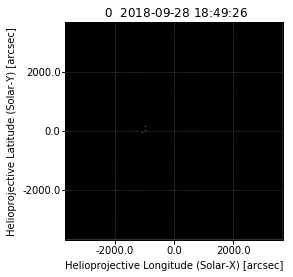

In [11]:
# Filter the evt file
cleanevt = nustar.filter.event_filter(evtdata,fpm='A',energy_low=2.5, energy_high=5.0)

# Map the filtered evt, into one corrected for livetime (so units count/s) 
nustar_map = nustar.map.make_sunpy(cleanevt, hdr,norm_map=True)

# Immeditate plot to check ok
nustar_map.plot()
plt.show()

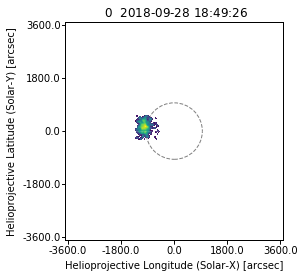

In [4]:
#Apply a guassian blur to the data to bring out the faint feature
dd=ndimage.gaussian_filter(nustar_map.data, 10, mode='nearest')

# Tidy things up before plotting
dmin=1e-5
dmax=1e-3
dd[dd < dmin]=0
nm=sunpy.map.Map(dd, nustar_map.meta)

# change the color map
nm.plot_settings['norm'] = colors.LogNorm(vmin=dmin,vmax=dmax)
nm.plot_settings['cmap'] = plt.viridis()

# Immeditate plot to check ok
nm.plot()
nm.draw_limb(color='grey',linewidth=1,linestyle='dashed',zorder=0)   
plt.show()

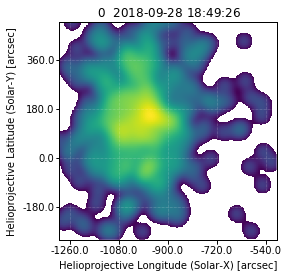

In [5]:
#Zoom into what is happening
bl = SkyCoord(-1300*u.arcsec, -300*u.arcsec, frame=nm.coordinate_frame)
tr = SkyCoord(-500*u.arcsec, 500*u.arcsec, frame=nm.coordinate_frame)
nms = nm.submap(bl,tr)

# Immeditate plot to check ok
nms.plot()
plt.show()

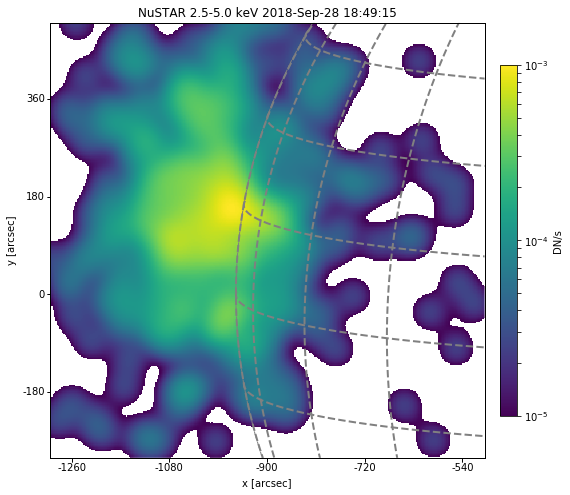

In [6]:
#Make the plot look nicer

#Make the figure bigger
fig = plt.figure(figsize=(9, 8))
#Need to pull out the details so can tweak in a few lines
ax = plt.subplot(projection=nms)

# Plot the map
nms.plot()

#Add in the limb
nms.draw_limb(color='grey',linewidth=1,linestyle='dashed',zorder=1)    

# Put on a nice stonyhurst grid
overlay = ax.get_coords_overlay('heliographic_stonyhurst')
lon = overlay[0]
lat = overlay[1]
lon.set_ticks_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_ticklabel_visible(False)
lon.coord_wrap = 180
lon.set_major_formatter('dd')
overlay.grid(color='grey', linewidth=2, linestyle='dashed')

# Tweak the titles and labels
title_obsdate='{:.20}'.format('{:%Y-%b-%d %H:%M:%s}'.format(nms.date))
ax.set_title('NuSTAR 2.5-5.0 keV '+ title_obsdate)
ax.set_ylabel('y [arcsec]')
ax.set_xlabel('x [arcsec]')
# Can just plot the axis labels as integers
tx, ty = ax.coords
tx.set_major_formatter('s')
ty.set_major_formatter('s')
#Get rid of the default helioprojective grid
ax.grid(False)
# Add a colour bar
plt.colorbar(fraction=0.035, pad=0.03,label='DN/s')
plt.show()

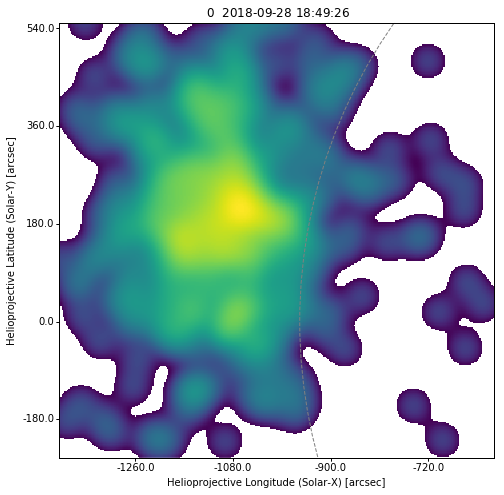

In [7]:
# Let's just shift the map by some amount
nms_sh=nms.shift(-100*u.arcsec,50*u.arcsec)

fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(projection=nms_sh)
nms_sh.plot()
nms_sh.draw_limb(color='grey',linewidth=1,linestyle='dashed',zorder=1)    
ax.grid(False)
plt.show()